In [ ]:
# Background

We aim to compute the following quantity:
$$
\mathbb{P}(\Omega^{\text{vis}}) 
  = \sum_{k=2}^{n} \mathbb{P}(\Omega^{\text{vis}}_k)
$$
whereby
\begin{equation}
\mathbb{P}(\Omega^{\text{vis}}_k) = p^{\neg \rho}_{n,k} \frac{\rho}{k-1+\rho} q_{k+1,(0,0)}
\end{equation}

In order to do this, we need to compute a series of **auxiliary variables**:
\begin{equation}
p^{\neg \rho}_{n_1,n_2} = \prod_{n_2 < k \leq n_1} \frac{k-1}{k-1+\rho}
\end{equation}

The probabilities $(q_{k,{i,j}})_{k \in \mathbb{N}, i,j \in \lbrace 0,1,2 \rbrace}$ satisfy the following recursive linear system:
\begin{align}
q_{k,(0,0)} &= \frac{(k-2) ( q_{k-1,(1,0)} + q_{k-1,(0,1)}) + \binom{k-2}{2} q_{k-1,(0,0)} }{\binom{k}{2} + \frac{k}{2} \rho} \\
q_{k,(0,1)} &= \frac{\frac{1}{2} \theta_2 \, q_{k,(0,2)} + (k-2) \, q_{k-1,(1,1)} + \binom{k-1}{2} \, q_{k-1,(0,1)} }{\binom{k}{2} + \frac{k}{2} \rho + \frac{1}{2}\theta_2} \\
q_{k,(1,0)} &= \frac{\frac{1}{2} \theta_1 \, q_{k,(2,0)} + (k-2) \, q_{k-1,(1,1)} + \binom{k-1}{2} \, q_{k-1,(1,0)} }{\binom{k}{2} + \frac{k}{2} \rho + \frac{1}{2}\theta_1} \\
q_{k,(0,2)} &= \frac{(k-2) q_{k-1,(1,2)} + \binom{k-1}{2} q_{k-1,(0,2)} }{\binom{k}{2} + \frac{k}{2} \rho} \\
q_{k,(2,0)} &= \frac{(k-2) q_{k-1,(2,1)} + \binom{k-1}{2} q_{k-1,(2,1)} }{\binom{k}{2} + \frac{k}{2} \rho} \\q_{k,(1,1)} &= \frac{\frac{1}{2} \theta_1 \, q_{k,(2,1)} + \frac{1}{2} \theta_2 q_{k,(1,2)} + \left( \binom{k}{2} - 1 \right) \, q_{k-1,(1,1)} }{\binom{k}{2} + \frac{k}{2} \rho + \frac{1}{2} ( \theta_1 + \theta_2 ) } \\
q_{k,(1,2)} &= \frac{\frac{1}{2} \theta_1 q_{k,(2,2)} + \left( \binom{k}{2} - 1 \right) q_{k-1,(1,2)}}{\binom{k}{2} + \frac{k}{2} \rho + \frac{1}{2}\theta_1}\\
q_{k,(2,1)} &= \frac{\frac{1}{2} \theta_2 q_{k,(2,2)} + \left( \binom{k}{2} - 1 \right) q_{k-1,(2,1)}}{\binom{k}{2} + \frac{k}{2} \rho + \frac{1}{2}\theta_2}
\end{align}

with boundary conditions:
\begin{align}
q_{k,(0,0)} &= 0 \text{ if } k<4 \\
q_{k,(0,1)} &= 0 \text{ if } k<3 \\
q_{k,(1,0)} &= 0 \text{ if } k<3 \\
q_{k,(0,2)} &= 0 \text{ if } k<3 \\
q_{k,(2,0)} &= 0 \text{ if } k<3 \\
q_{k,(1,1)} &= 0 \text{ if } k<2 \\
q_{k,(1,2)} &= 0 \text{ if } k<2 \\
q_{k,(2,1)} &= 0 \text{ if } k<2 \\
q_{k,(2,2)} &= p^{\neg \rho}_{k,1} = \prod_{i = 2}^k \frac{i-1}{i-1+\rho}
\end{align}

The solution of this system will be a series of rational functions of integers $n \geq k > 1$ and non-negative reals $\rho, \theta_1, \theta_2$.

# Implementation

In [1]:
def p_neg(n1,n2,rho):
    'The probability that a set of n1 lineages will coalesce to n2 lineages before experiencing recurison'
    assert n1 >= n2
    assert n2 > 0

    if isinstance(rho,int):
        rho = float(rho)
    if isinstance(rho,float):
        assert rho >= 0
    
    return reduce( lambda x,y: x*y, [(k - 1)/(k-1+rho) for k in range(n1,n2,-1)], 1)

In [2]:
def choose2(k):
    return (k*(k-1))/2

In [3]:
def q_recursive(k,i,j,theta1,theta2,rho):
    'compute q_{k,(i,j)} using tail-recursion.'
    
    #convert integers to float (since a/b performs integer division if a and b are both integers)
    if isinstance(rho,int):
        rho = float(rho)
    if isinstance(theta1,int):
        theta1 = float(theta1)
    if isinstance(theta2,int):
        theta2 = float(theta2)
    
    if   (i,j) == (0,0):
        if k < 4:
            return 0
        else:
            a = q_recursive(k-1, 1, 0, theta1,theta2,rho)
            b = q_recursive(k-1, 0, 1, theta1,theta2,rho)
            c = q_recursive(k-1, 0, 0, theta1,theta2,rho)
            result = ( (k - 2)*(a+b) + choose2(k-2)*c ) / (choose2(k) + k*rho/2)
            return result
            
    elif (i,j) == (0,1):
        if k < 3:
            return 0
        else:
            a = q_recursive(k  , 0, 2, theta1,theta2,rho)
            b = q_recursive(k-1, 1, 1, theta1,theta2,rho)
            c = q_recursive(k-1, 0, 1, theta1,theta2,rho)
            result = ( a*theta2/2 + (k - 2)*b + choose2(k-1)*c ) / ( choose2(k) + (k*rho + theta2)/2 )
            return result

    elif (i,j) == (1,0):
        if k < 3:
            return 0
        else:
            a = q_recursive(k  , 2, 0, theta1,theta2,rho)
            b = q_recursive(k-1, 1, 1, theta1,theta2,rho)
            c = q_recursive(k-1, 1, 0, theta1,theta2,rho)
            result = ( a*theta1/2 + (k - 2)*b + choose2(k-1)*c ) / ( choose2(k) + (k*rho + theta1)/2 )
            return result

    elif (i,j) == (0,2):
        if k < 3:
            return 0
        else:
            a = q_recursive(k-1, 1, 2, theta1,theta2,rho)
            b = q_recursive(k-1, 0, 2, theta1,theta2,rho)
            result = ( (k - 2)*a + choose2(k-1)*b ) / ( choose2(k) + k*rho/2 )
            return result
    
    elif (i,j) == (2,0):
        if k < 3:
            return 0
        else:
            a = q_recursive(k-1, 2, 1, theta1,theta2,rho)
            b = q_recursive(k-1, 2, 0, theta1,theta2,rho)
            result = ( (k - 2)*a + choose2(k-1)*b ) / ( choose2(k) + k*rho/2 )
            return result
    
    elif (i,j) == (1,1):
        if k < 2:
            return 0
        else:
            a = q_recursive(k  , 2, 1, theta1,theta2,rho)
            b = q_recursive(k  , 1, 2, theta1,theta2,rho)
            c = q_recursive(k-1, 1, 1, theta1,theta2,rho)
            result = ( (theta1*a + theta2*b)/2 + (choose2(k) - 1)*c ) / ( choose2(k) + (k*rho + theta1 + theta2)/2 )
            return result
    
    elif (i,j) == (1,2):
        if k < 2:
            return 0
        else:
            a = q_recursive(k  , 2, 2, theta1,theta2,rho)
            b = q_recursive(k-1, 1, 2, theta1,theta2,rho)
            result = ( a*theta1/2 + (choose2(k) - 1)*b ) / ( choose2(k) + (k*rho + theta1)/2 )
            return result
    
    elif (i,j) == (2,1):
        if k < 2:
            return 0
        else:
            a = q_recursive(k  , 2, 2, theta1,theta2,rho)
            b = q_recursive(k-1, 2, 1, theta1,theta2,rho)
            result = ( a*theta2/2 + (choose2(k) - 1)*b ) / ( choose2(k) + (k*rho + theta2)/2 )
            return result
    
    elif (i,j) == (2,2):
        result = p_neg(k,1,rho)
        return result
    
    else:
        raise ValueError('0 <= i,j <= 2 must hold; arguments here: i = %i, j=%i'%(i,j))

In [4]:
def q_recursive_memorized(k,i,j,theta1,theta2,rho, known_values = None ):
    '''compute q_{k,(i,j)} using tail-recursion and tableing of known values.
    
Returns q_{k,(i,j)} as well as a dictionary of other q-values computed in the
process of determining q_{k,(i,j)}.'''
    
    if known_values == None:
        known_values = dict()
    
    #check to see if we already know q_{k,(i,j)}
    if (k,i,j) in known_values:
        return known_values[(k,i,j)],known_values
    
    #convert integers to float (since a/b performs integer division if a and b are both integers)
    if isinstance(rho,int):
        rho = float(rho)
    if isinstance(theta1,int):
        theta1 = float(theta1)
    if isinstance(theta2,int):
        theta2 = float(theta2)
    
    if   (i,j) == (0,0):
        if k < 4:
            result = 0
        else:
            a,known_values = q_recursive_memorized(k-1, 1, 0, theta1,theta2,rho, known_values)
            b,known_values = q_recursive_memorized(k-1, 0, 1, theta1,theta2,rho, known_values)
            c,known_values = q_recursive_memorized(k-1, 0, 0, theta1,theta2,rho, known_values)
            result = ( (k - 2)*(a+b) + choose2(k-2)*c ) / (choose2(k) + k*rho/2)
            
    elif (i,j) == (0,1):
        if k < 3:
            result = 0
        else:
            a,known_values = q_recursive_memorized(k  , 0, 2, theta1,theta2,rho, known_values)
            b,known_values = q_recursive_memorized(k-1, 1, 1, theta1,theta2,rho, known_values)
            c,known_values = q_recursive_memorized(k-1, 0, 1, theta1,theta2,rho, known_values)
            result = ( a*theta2/2 + (k - 2)*b + choose2(k-1)*c ) / ( choose2(k) + (k*rho + theta2)/2 )

    elif (i,j) == (1,0):
        if k < 3:
            result = 0
        else:
            a,known_values = q_recursive_memorized(k  , 2, 0, theta1,theta2,rho, known_values)
            b,known_values = q_recursive_memorized(k-1, 1, 1, theta1,theta2,rho, known_values)
            c,known_values = q_recursive_memorized(k-1, 1, 0, theta1,theta2,rho, known_values)
            result = ( a*theta1/2 + (k - 2)*b + choose2(k-1)*c ) / ( choose2(k) + (k*rho + theta1)/2 )

    elif (i,j) == (0,2):
        if k < 3:
            result = 0
        else:
            a,known_values = q_recursive_memorized(k-1, 1, 2, theta1,theta2,rho, known_values)
            b,known_values = q_recursive_memorized(k-1, 0, 2, theta1,theta2,rho, known_values)
            result = ( (k - 2)*a + choose2(k-1)*b ) / ( choose2(k) + k*rho/2 )
    
    elif (i,j) == (2,0):
        if k < 3:
            result = 0
        else:
            a,known_values = q_recursive_memorized(k-1, 2, 1, theta1,theta2,rho, known_values)
            b,known_values = q_recursive_memorized(k-1, 2, 0, theta1,theta2,rho, known_values)
            result = ( (k - 2)*a + choose2(k-1)*b ) / ( choose2(k) + k*rho/2 )
    
    elif (i,j) == (1,1):
        if k < 2:
            result = 0
        else:
            a,known_values = q_recursive_memorized(k  , 2, 1, theta1,theta2,rho, known_values)
            b,known_values = q_recursive_memorized(k  , 1, 2, theta1,theta2,rho, known_values)
            c,known_values = q_recursive_memorized(k-1, 1, 1, theta1,theta2,rho, known_values)
            result = ( (theta1*a + theta2*b)/2 + (choose2(k) - 1)*c ) / ( choose2(k) + (k*rho + theta1 + theta2)/2 )
    
    elif (i,j) == (1,2):
        if k < 2:
            result = 0
        else:
            a,known_values = q_recursive_memorized(k  , 2, 2, theta1,theta2,rho, known_values)
            b,known_values = q_recursive_memorized(k-1, 1, 2, theta1,theta2,rho, known_values)
            result = ( a*theta1/2 + (choose2(k) - 1)*b ) / ( choose2(k) + (k*rho + theta1)/2 )
    
    elif (i,j) == (2,1):
        if k < 2:
            result = 0
        else:
            a,known_values = q_recursive_memorized(k  , 2, 2, theta1,theta2,rho, known_values)
            b,known_values = q_recursive_memorized(k-1, 2, 1, theta1,theta2,rho, known_values)
            result = ( a*theta2/2 + (choose2(k) - 1)*b ) / ( choose2(k) + (k*rho + theta2)/2 )
    
    elif (i,j) == (2,2):
        result = p_neg(k,1,rho)
    
    else:
        raise ValueError('0 <= i,j <= 2 must hold; arguments here: i = %i, j=%i'%(i,j))
    
    known_values[(k,i,j)] = result
    return result, known_values

In [5]:
q_recursive_memorized(50,0,0,1.0,1.0,0.0)[0] - q_recursive(50,0,0,1.0,1.0,0.0)

0.0

In [6]:
q_recursive_memorized(6,0,0,1.0,1.0,0.0)[1]

{(1, 1, 1): 0,
 (1, 1, 2): 0,
 (1, 2, 1): 0,
 (2, 0, 1): 0,
 (2, 0, 2): 0,
 (2, 1, 0): 0,
 (2, 1, 1): 0.16666666666666666,
 (2, 1, 2): 0.3333333333333333,
 (2, 2, 0): 0,
 (2, 2, 1): 0.3333333333333333,
 (2, 2, 2): 1.0,
 (3, 0, 0): 0,
 (3, 0, 1): 0.06349206349206349,
 (3, 0, 2): 0.1111111111111111,
 (3, 1, 0): 0.06349206349206349,
 (3, 1, 1): 0.16666666666666666,
 (3, 1, 2): 0.3333333333333333,
 (3, 2, 0): 0.1111111111111111,
 (3, 2, 1): 0.3333333333333333,
 (3, 2, 2): 1.0,
 (4, 0, 0): 0.042328042328042326,
 (4, 0, 1): 0.0934065934065934,
 (4, 0, 2): 0.16666666666666666,
 (4, 1, 0): 0.0934065934065934,
 (4, 1, 1): 0.16666666666666666,
 (4, 1, 2): 0.3333333333333333,
 (4, 2, 0): 0.16666666666666666,
 (4, 2, 1): 0.3333333333333333,
 (4, 2, 2): 1.0,
 (5, 0, 0): 0.06874236874236873,
 (5, 0, 1): 0.11051805337519623,
 (5, 0, 2): 0.2,
 (5, 1, 0): 0.11051805337519623,
 (5, 2, 0): 0.2,
 (6, 0, 0): 0.08643990929705216}

# Symbolic computation

The above implmentation also supports symbolic computation. We may use this to get exact formulas expressing $q_{k,(0,0)}$ as a rational function in the indeterminates $\theta_1, \theta_2$, and $\rho$ (the below does just this using sympy):

In [29]:
import sympy
sympy.init_printing(use_latex=True)

In [8]:
k = 4
t, t1,t2,r = sympy.symbols(r'\theta \theta_1 \theta_2 \rho')
f = q_recursive(k,0,0,t1,t2,r) # general formula
g = f.subs(r,0) # f with \rho = 0
h = q_recursive(k,0,0,t/2,t/2,r) # f with theta1 = theta2 = theta/2

In [31]:
sympy.pprint(f)
print g,'\n'
print h,'\n'

  ⎛                                                          \theta₁⋅\theta₂  
  ⎜                                                 ──────────────────────────
  ⎜                                                              ⎛       \thet
  ⎜                                                 4⋅(\rho + 1)⋅⎜\rho + ─────
  ⎜               \theta₁⋅\theta₂                                ⎝          2 
2⋅⎜────────────────────────────────────────────── + ──────────────────────────
  ⎜             ⎛3⋅\rho    ⎞ ⎛       \theta₁    ⎞                             
  ⎜4⋅(\rho + 1)⋅⎜────── + 3⎟⋅⎜\rho + ─────── + 1⎟                        \rho 
  ⎝             ⎝  2       ⎠ ⎝          2       ⎠                             
──────────────────────────────────────────────────────────────────────────────
                                                   3⋅\rho   \theta₂           
                                                   ────── + ─────── + 3       
                                                    

### We may also print these expressions in latex:

In [10]:
print sympy.latex(f),'\n'
print sympy.latex(f.simplify()),'\n\n'
print sympy.latex(g),'\n'
print sympy.latex(g.simplify()),'\n\n'
print sympy.latex(h),'\n'
print sympy.latex(h.simplify()),'\n\n'
#print sympy.latex(g)

\frac{1}{2 \rho + 6} \left(\frac{1}{\frac{3 \rho}{2} + \frac{\theta_2}{2} + 3} \left(\frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\frac{3 \rho}{2} + 3\right) \left(\rho + \frac{\theta_1}{2} + 1\right)} + \frac{1}{\rho + \frac{\theta_1}{2} + \frac{\theta_2}{2} + 1} \left(\frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\rho + \frac{\theta_2}{2} + 1\right)} + \frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\rho + \frac{\theta_1}{2} + 1\right)}\right)\right) + \frac{1}{\frac{3 \rho}{2} + \frac{\theta_1}{2} + 3} \left(\frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\frac{3 \rho}{2} + 3\right) \left(\rho + \frac{\theta_2}{2} + 1\right)} + \frac{1}{\rho + \frac{\theta_1}{2} + \frac{\theta_2}{2} + 1} \left(\frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\rho + \frac{\theta_2}{2} + 1\right)} + \frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\rho + \frac{\theta_1}{2} + 1\right)}\right)\right)\right) 

\frac{2 \theta_1 \theta_2 \left(\left(3 \left(\rho

this latex-source code can then be typeset:

### *f* :
$$\frac{1}{2 \rho + 6} \left(\frac{1}{\frac{3 \rho}{2} + \frac{\theta_2}{2} + 3} \left(\frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\frac{3 \rho}{2} + 3\right) \left(\rho + \frac{\theta_1}{2} + 1\right)} + \frac{1}{\rho + \frac{\theta_1}{2} + \frac{\theta_2}{2} + 1} \left(\frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\rho + \frac{\theta_2}{2} + 1\right)} + \frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\rho + \frac{\theta_1}{2} + 1\right)}\right)\right) + \frac{1}{\frac{3 \rho}{2} + \frac{\theta_1}{2} + 3} \left(\frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\frac{3 \rho}{2} + 3\right) \left(\rho + \frac{\theta_2}{2} + 1\right)} + \frac{1}{\rho + \frac{\theta_1}{2} + \frac{\theta_2}{2} + 1} \left(\frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\rho + \frac{\theta_2}{2} + 1\right)} + \frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\rho + \frac{\theta_1}{2} + 1\right)}\right)\right)\right)$$

### *f* (simplified) :
$$\frac{2 \theta_1 \theta_2 \left(\left(3 \left(\rho + 2\right) \left(4 \rho + \theta_1 + \theta_2 + 4\right) + \left(2 \rho + \theta_1 + 2\right) \left(2 \rho + \theta_1 + \theta_2 + 2\right)\right) \left(3 \rho + \theta_2 + 6\right) + \left(3 \left(\rho + 2\right) \left(4 \rho + \theta_1 + \theta_2 + 4\right) + \left(2 \rho + \theta_2 + 2\right) \left(2 \rho + \theta_1 + \theta_2 + 2\right)\right) \left(3 \rho + \theta_1 + 6\right)\right)}{3 \left(\rho + 1\right) \left(\rho + 2\right) \left(\rho + 3\right) \left(2 \rho + \theta_1 + 2\right) \left(2 \rho + \theta_2 + 2\right) \left(3 \rho + \theta_1 + 6\right) \left(3 \rho + \theta_2 + 6\right) \left(2 \rho + \theta_1 + \theta_2 + 2\right)} $$

### *g* :
$$
\frac{1}{\frac{3 \theta_2}{2} + 9} \left(\frac{\theta_1 \theta_2}{6 \theta_1 + 12} + \frac{1}{\frac{\theta_1}{2} + \frac{\theta_2}{2} + 1} \left(\frac{\theta_1 \theta_2}{2 \theta_2 + 4} + \frac{\theta_1 \theta_2}{2 \theta_1 + 4}\right)\right) + \frac{1}{\frac{3 \theta_1}{2} + 9} \left(\frac{\theta_1 \theta_2}{6 \theta_2 + 12} + \frac{1}{\frac{\theta_1}{2} + \frac{\theta_2}{2} + 1} \left(\frac{\theta_1 \theta_2}{2 \theta_2 + 4} + \frac{\theta_1 \theta_2}{2 \theta_1 + 4}\right)\right)$$

### *g*  (simplified) :
$$
\frac{\theta_1 \theta_2}{9 \left(\theta_1 + 2\right) \left(\theta_1 + 6\right) \left(\theta_2 + 2\right) \left(\theta_2 + 6\right) \left(\theta_1 + \theta_2 + 2\right)} \left(\left(\theta_1 + 6\right) \left(6 \theta_1 + 6 \theta_2 + \left(\theta_2 + 2\right) \left(\theta_1 + \theta_2 + 2\right) + 24\right) + \left(\theta_2 + 6\right) \left(6 \theta_1 + 6 \theta_2 + \left(\theta_1 + 2\right) \left(\theta_1 + \theta_2 + 2\right) + 24\right)\right) $$

### *h* :
$$\frac{1}{\left(2 \rho + 6\right) \left(\frac{3 \rho}{2} + \frac{\theta}{4} + 3\right)} \left(\frac{\theta^{2}}{2 \left(\rho + 1\right) \left(\rho + \frac{\theta}{4} + 1\right) \left(\rho + \frac{\theta}{2} + 1\right)} + \frac{\theta^{2}}{4 \left(\rho + 1\right) \left(\frac{3 \rho}{2} + 3\right) \left(\rho + \frac{\theta}{4} + 1\right)}\right)$$
 ### *h* (simplified) :
 $$
\frac{4 \theta^{2} \left(8 \rho + \theta + 14\right)}{3 \left(\rho + 1\right) \left(\rho + 2\right) \left(\rho + 3\right) \left(2 \rho + \theta + 2\right) \left(4 \rho + \theta + 4\right) \left(6 \rho + \theta + 12\right)} 
$$

## Towards conditionals

We now define the following:

\begin{align}
\mathbb{P} (\Omega_k)
   &=  \frac{\rho}{k-1 + \rho} \frac{k}{k + \rho} \prod_{i=2}^n \frac{i-1}{i - 1 + \rho} \\
   &=  \frac{\rho}{k-1 + \rho} \frac{k}{k + \rho} p^{\neg \rho}_{n,1}
\end{align}
and
\begin{align}
\mathbb{P}(\Omega_{2,\ldots,n})
   &=  \sum_{k = 2}^n \mathbb{P} (\Omega_k) \\
   &=  p^{\neg \rho}_{n,1} \sum_{k = 2}^n \frac{\rho}{k-1 + \rho} \frac{k}{k + \rho}
\end{align}

We furthermore define:
$$
\mathbb{P}(\Omega^{\text{vis}} \mid \Omega_{2,\ldots,n})
  = \frac{ \sum_{k=3}^{n} p^{\neg \rho}_{n,k} \frac{\rho}{k-1+\rho} q_{k+1,(0,0)} }{ p^{\neg \rho}_{n,1} \sum_{k = 2}^n \frac{\rho}{k-1 + \rho} \frac{k}{k + \rho} }
$$

In [11]:
def precompute_q(k_max,theta1,theta2,rho):
    known_values = dict()

    k_range = range(3,k_max+3,30)
    if k_range[-1] < k_max+2:
        k_range.append(k_max+2)

    for k in k_range:
        known_values = q_recursive_memorized(k,0,0,theta1,theta2,rho,known_values)[1]

    return known_values
    #return q_recursive_memorized(k_max+2,0,0,theta1,theta2,rho)[1]

In [12]:
def P_omega_k(k,n,rho):
    return p_neg(n,1,rho) * ( (rho*k) / ( (k-1+rho) * (k+rho) ) )

def P_omega_toN(n,rho):
    return p_neg(n,1,rho) * sum([(rho*k) / ( (k-1+rho) * (k+rho) ) for k in xrange(2,n+1)])

def P_omegea_vis_k(k,n,theta1,theta2,rho, q_precomputed = None):
    if q_precomputed != None:
        if (k+1,0,0) not in q_precomputed:
            print (k+1,0,0), q_precomputed[(k+1,0,0)]
        q = q_precomputed[(k+1,0,0)]
        return p_neg(n,k,rho) * ( rho / (k-1+rho) ) * q
    else:
        return p_neg(n,k,rho) * ( rho / (k-1+rho) ) * q_recursive(k+1,0,0,theta1,theta2,rho)

def P_omega_vis(n,theta1,theta2,rho, precompute = True):
    k_range = range(3,n+1) if n>1 else []
    q_precomputed = precompute_q(n+1,theta1,theta2,rho) if precompute else None
    return sum([P_omegea_vis_k(k,n,theta1,theta2,rho,q_precomputed) for k in k_range])

def P_omega_vis_conditioned(n,theta1,theta2,rho):
    if n<3:
        return 0
    else:
        numerator = P_omega_vis(n,theta1,theta2,rho)
        denominator = P_omega_toN(n,rho)
        return numerator / denominator

In [13]:
#verify that precomputing does not affect outcome
P_omega_vis(4,0.5,0.5,1.0,True) - P_omega_vis(4,0.5,0.5,1.0,False)

0.0

In [14]:
D = precompute_q(100,0.5,0.5,1.0)

#### A numerical example

In [15]:
n = 3
k = 3
theta1, theta2 = 0.5,0.5
rho = 1.0

print P_omega_k(k,n,rho),'\n'
print P_omega_toN(n,rho),'\n'
print P_omegea_vis_k(k,n,theta1,theta2,rho),'\n'
print P_omega_vis(n,theta1,theta2,rho,precompute=False),'\n'
print P_omega_vis_conditioned(n,theta1,theta2,rho),'\n'

0.0833333333333 

0.111111111111 

0.000498158977691 

0.000498158977691 

0.00448343079922 



#### A symbolic example

In [16]:
n = 3
k = 3
theta, theta1, theta2, t1,t2 = sympy.symbols(r'\theta \theta_1 \theta_2 t1 t2')
r, rho = sympy.symbols(r'r \rho')

sympy.pprint(P_omega_k(k,n,r))
print '\n'
sympy.pprint(P_omega_toN(n,r))
print '\n'
sympy.pprint(sympy.simplify(P_omegea_vis_k(k,n,t1,t2,r)))
print '\n'
sympy.pprint(sympy.simplify(P_omega_vis(n,t1,t2,r)))
print '\n'
sympy.pprint(sympy.simplify(P_omega_vis_conditioned(n,t1,t2,r)))

          6⋅r           
────────────────────────
               2        
(r + 1)⋅(r + 2) ⋅(r + 3)


       4⋅r       
─────────────────
       2        2
(r + 1) ⋅(r + 2) 


2⋅r⋅t₁⋅t₂⋅((3⋅(r + 2)⋅(4⋅r + t₁ + t₂ + 4) + (2⋅r + t₁ + 2)⋅(2⋅r + t₁ + t₂ + 2)
──────────────────────────────────────────────────────────────────────────────
                                                       2                      
                                      3⋅(r + 1)⋅(r + 2) ⋅(r + 3)⋅(2⋅r + t₁ + 2

)⋅(3⋅r + t₂ + 6) + (3⋅(r + 2)⋅(4⋅r + t₁ + t₂ + 4) + (2⋅r + t₂ + 2)⋅(2⋅r + t₁ +
──────────────────────────────────────────────────────────────────────────────
                                                                              
)⋅(2⋅r + t₂ + 2)⋅(3⋅r + t₁ + 6)⋅(3⋅r + t₂ + 6)⋅(2⋅r + t₁ + t₂ + 2)            

 t₂ + 2))⋅(3⋅r + t₁ + 6))
─────────────────────────
                         
                         


2⋅r⋅t₁⋅t₂⋅((3⋅(r + 2)⋅(4⋅r + t₁ + t₂ + 4) + (2⋅r + t₁ + 2)⋅(2⋅r + t₁ + t₂ + 2)
─────

In [17]:
p_3 = P_omega_vis(3,theta1,theta2,rho)
p_3_star = P_omega_vis_conditioned(3,theta1,theta2,rho)
p_3_symm = P_omega_vis(3,theta/2,theta/2,rho)
p_3_star_symm = P_omega_vis_conditioned(3,theta/2,theta/2,rho)

In [18]:
print sympy.latex(p_3),'\n\n'
print sympy.latex(p_3.simplify()),'\n\n'
print sympy.latex(p_3_symm),'\n\n'
print sympy.latex(p_3_symm.simplify()),'\n\n'

print sympy.latex(p_3_star.simplify()),'\n\n'
print sympy.latex(p_3_star_symm.simplify())

\frac{\rho}{\left(\rho + 2\right) \left(2 \rho + 6\right)} \left(\frac{1}{\frac{3 \rho}{2} + \frac{\theta_2}{2} + 3} \left(\frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\frac{3 \rho}{2} + 3\right) \left(\rho + \frac{\theta_1}{2} + 1\right)} + \frac{1}{\rho + \frac{\theta_1}{2} + \frac{\theta_2}{2} + 1} \left(\frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\rho + \frac{\theta_2}{2} + 1\right)} + \frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\rho + \frac{\theta_1}{2} + 1\right)}\right)\right) + \frac{1}{\frac{3 \rho}{2} + \frac{\theta_1}{2} + 3} \left(\frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\frac{3 \rho}{2} + 3\right) \left(\rho + \frac{\theta_2}{2} + 1\right)} + \frac{1}{\rho + \frac{\theta_1}{2} + \frac{\theta_2}{2} + 1} \left(\frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\rho + \frac{\theta_2}{2} + 1\right)} + \frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\rho + \frac{\theta_1}{2} + 1\right)}\right)\right)\right) 


\frac{2 \rh

### We compute values for a table of examples
Currently table 1 in my note.

In [19]:
examples = [(n,r,t1,t2) for n in (3,10,20,30,40,50) for (r,t1,t2) in [(1.0,0.5,0.5),(1.0,0.01,0.99),(1e-6,1e6,1e6)]]
results = []
for ex in examples:
    n,r,t1,t2 = ex
    print 'n = %i, r = %.3g,t1 = %.3g,t2 = %.3g'%ex

    ex_res = []
    
    ex_res.append(P_omega_toN(n,r))
    print 'P(Omega 2 to %i) :\t%.5g'%(n,ex_res[-1])
    
    ex_res.append(P_omega_vis(n,t1,t2,r))
    print 'P(Omega_vis) :\t%.5g'%(ex_res[-1])
    
    ex_res.append(ex_res[1]/ex_res[0])
    print 'P( Omega_vis | Omega 2 to %i) :\t%.5g'%(n,ex_res[-1])
    
    print ''
    
    results.append(ex_res)

n = 3, r = 1,t1 = 0.5,t2 = 0.5
P(Omega 2 to 3) :	0.11111
P(Omega_vis) :	0.00049816
P( Omega_vis | Omega 2 to 3) :	0.0044834

n = 3, r = 1,t1 = 0.01,t2 = 0.99
P(Omega 2 to 3) :	0.11111
P(Omega_vis) :	1.9993e-05
P( Omega_vis | Omega 2 to 3) :	0.00017993

n = 3, r = 1e-06,t1 = 1e+06,t2 = 1e+06
P(Omega 2 to 3) :	1e-06
P(Omega_vis) :	1.1111e-07
P( Omega_vis | Omega 2 to 3) :	0.11111

n = 10, r = 1,t1 = 0.5,t2 = 0.5
P(Omega 2 to 10) :	0.1429
P(Omega_vis) :	0.0017055
P( Omega_vis | Omega 2 to 10) :	0.011935

n = 10, r = 1,t1 = 0.01,t2 = 0.99
P(Omega 2 to 10) :	0.1429
P(Omega_vis) :	6.8446e-05
P( Omega_vis | Omega 2 to 10) :	0.00047899

n = 10, r = 1e-06,t1 = 1e+06,t2 = 1e+06
P(Omega 2 to 10) :	2.7178e-06
P(Omega_vis) :	8.1078e-07
P( Omega_vis | Omega 2 to 10) :	0.29832

n = 20, r = 1,t1 = 0.5,t2 = 0.5
P(Omega 2 to 20) :	0.10489
P(Omega_vis) :	0.0016813
P( Omega_vis | Omega 2 to 20) :	0.016029

n = 20, r = 1,t1 = 0.01,t2 = 0.99
P(Omega 2 to 20) :	0.10489
P(Omega_vis) :	6.7479e-05
P( Omega_vis 

In [20]:
l = []

In [21]:
l.append(5)

In [22]:
l

[5]

In [56]:
r = sympy.symbols('r')

In [69]:
q = precompute_q(20,theta1,theta2,rho)

In [74]:
print sympy.latex(sympy.simplify(q[(6,0,0)]))

\frac{4 \theta_1 \theta_2}{5 \left(\rho + 1\right) \left(\rho + 2\right) \left(\rho + 3\right) \left(\rho + 4\right) \left(\rho + 5\right) \left(2 \rho + \theta_1 + 2\right) \left(2 \rho + \theta_2 + 2\right) \left(3 \rho + \theta_1 + 6\right) \left(3 \rho + \theta_2 + 6\right) \left(4 \rho + \theta_1 + 12\right) \left(4 \rho + \theta_2 + 12\right) \left(5 \rho + \theta_1 + 20\right) \left(5 \rho + \theta_2 + 20\right) \left(2 \rho + \theta_1 + \theta_2 + 2\right) \left(3 \rho + \theta_1 + \theta_2 + 6\right) \left(4 \rho + \theta_1 + \theta_2 + 12\right)} \left(\left(5 \rho + \theta_1 + 20\right) \left(5 \rho + \theta_2 + 20\right) \left(2 \left(\left(3 \left(\rho + 2\right) \left(4 \rho + \theta_1 + \theta_2 + 4\right) + \left(2 \rho + \theta_1 + 2\right) \left(2 \rho + \theta_1 + \theta_2 + 2\right)\right) \left(3 \rho + \theta_2 + 6\right) + \left(3 \left(\rho + 2\right) \left(4 \rho + \theta_1 + \theta_2 + 4\right) + \left(2 \rho + \theta_2 + 2\right) \left(2 \rho + \theta_1 + \th

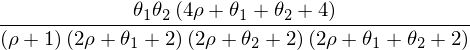

In [67]:
sympy.simplify(q[(2,1,1)])

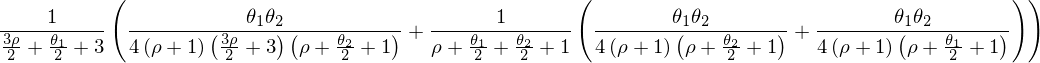

In [68]:
q[(3,1,0)]

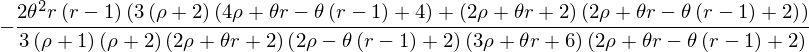

In [60]:
sympy.simplify(q[(3,1,0)])

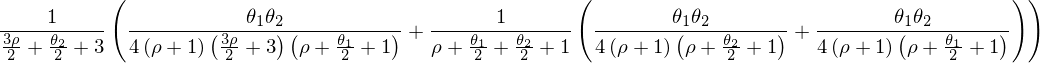

In [53]:
q[(3,0,1)]

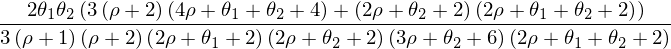

In [54]:
sympy.simplify(q[(3,0,1)])

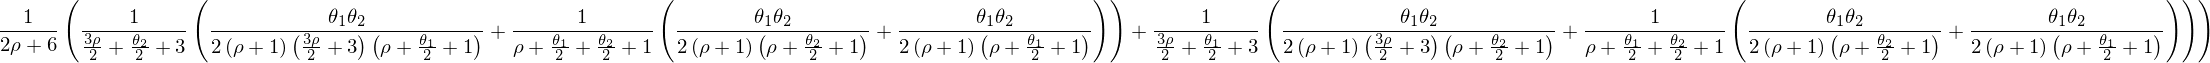

In [51]:
q[(4,0,0)]

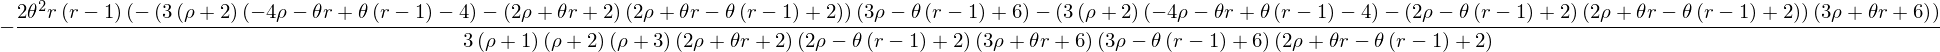

In [63]:
sympy.simplify(q[(4,0,0)])